In [2]:
import pickle
from keras.src.models.model import model_from_json
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.python.keras.callbacks import Callback
from matplotlib.colors import ListedColormap

In [3]:
directory = '../../AIModels/SCSS/SequentialBothCars/B12345678/'

with open(directory + 'DrivingComfortabilityPredictingModel.json', 'r') as json_file:
    model_json = json_file.read()
loaded_baseline_model = model_from_json(model_json)

loaded_baseline_model.load_weights(directory + 'DrivingComfortabilityPredictingModel.weights.h5')

loaded_baseline_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

loaded_baseline_model.summary()

Model: "BaselineComfortLevel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 388 (1.52 KB)

 Trainable params: 388 (1.52 KB)

 Non-trainable params: 0 (0.00 B)

500000/500000 ━━━━━━━━━━━━━━━━━━━━ 303s 606us/step
['yellow', 'green', 'orange', 'red']


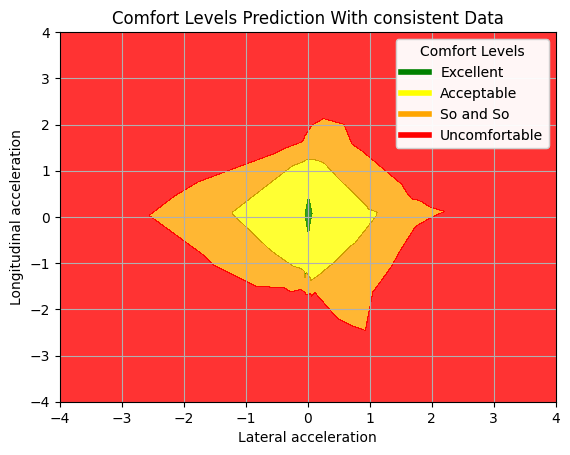

In [8]:
color_map_for_plot = {
    'Excellent': 'green',
    'Acceptable': 'yellow',
    'So and So': 'orange',
    'Uncomfortable': 'red',
}

class_names = ['Acceptable','Excellent',  'So and So', 'Uncomfortable']
custom_cmap = ListedColormap([color_map_for_plot[label] for label in class_names])
label_encoder = LabelEncoder()
encoded_personal_labels = label_encoder.fit_transform(['Acceptable','Excellent', 'So and So', 'Uncomfortable'])

step = 0.002
lateral_min = -4
lateral_max = 4
longitudinal_min = -4
longitudinal_max = 4
lateral, longitudinal = np.meshgrid(np.arange(lateral_min, lateral_max, step), np.arange(longitudinal_min, longitudinal_max, step))

predictions = loaded_baseline_model.predict(np.c_[lateral.ravel(), longitudinal.ravel()])
label_predictions = np.argmax(predictions, axis=1)
label_predictions_reshaped = label_predictions.reshape(lateral.shape)

fig, axis = plt.subplots()
axis.set_xlim(lateral_min, lateral_max)
axis.set_ylim(longitudinal_min, longitudinal_max)
print(str(custom_cmap.colors))
contour = axis.contourf(lateral, longitudinal, label_predictions_reshaped, cmap=custom_cmap, alpha=0.8)

plt.grid(True)
plt.xlabel('Lateral acceleration')
plt.ylabel('Longitudinal acceleration')
plt.title(f'Comfort Levels Prediction With consistent Data')

handles = [
    plt.Line2D([0], [0], color=color_map_for_plot[label], lw=4) for label in ['Excellent','Acceptable',  'So and So', 'Uncomfortable']
]
labels = ['Excellent','Acceptable',  'So and So', 'Uncomfortable']
legend = plt.legend(handles, labels, title='Comfort Levels', loc='upper right')
axis.add_artist(legend)

plt.show()

['yellow', 'green', 'orange', 'red']


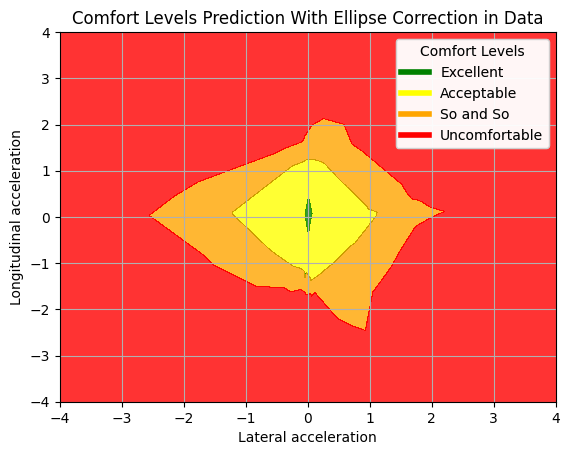

In [9]:
fig, axis = plt.subplots()
axis.set_xlim(lateral_min, lateral_max)
axis.set_ylim(longitudinal_min, longitudinal_max)
print(str(custom_cmap.colors))
contour = axis.contourf(lateral, longitudinal, label_predictions_reshaped, cmap=custom_cmap, alpha=0.8)

plt.grid(True)
plt.xlabel('Lateral acceleration')
plt.ylabel('Longitudinal acceleration')
plt.title(f'Comfort Levels Prediction With Ellipse Correction in Data')

handles = [
    plt.Line2D([0], [0], color=color_map_for_plot[label], lw=4) for label in ['Excellent','Acceptable',  'So and So', 'Uncomfortable']
]
labels = ['Excellent','Acceptable',  'So and So', 'Uncomfortable']
legend = plt.legend(handles, labels, title='Comfort Levels', loc='upper right')
axis.add_artist(legend)

plt.show()

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

color_map_for_plot2 = {
    'Excellent': 'green',
    'Acceptable': 'yellow',
    'So and So': 'orange',
    'Uncomfortable': 'red',
}

class_names2 = ['Acceptable','Excellent',  'So and So', 'Uncomfortable']
custom_cmap2 = ListedColormap([color_map_for_plot2[label] for label in class_names2])
label_encoder = LabelEncoder()
encoded_personal_labels2 = label_encoder.fit_transform(['Acceptable','Excellent', 'So and So', 'Uncomfortable'])

# Ensure the class names are ordered correctly for the color bar
class_names = ['Excellent', 'Acceptable', 'So and So', 'Uncomfortable']
color_order = ['green', 'yellow', 'orange', 'red']
custom_cmap = ListedColormap(color_order)
label_encoder = LabelEncoder()
encoded_personal_labels = label_encoder.fit_transform(class_names)

step = 0.02
lateral_min = -3.25
lateral_max = 3.25
longitudinal_min = -3.25
longitudinal_max = 3.25
lateral, longitudinal = np.meshgrid(np.arange(lateral_min, lateral_max, step), np.arange(longitudinal_min, longitudinal_max, step))

predictions = loaded_baseline_model.predict(np.c_[lateral.ravel(), longitudinal.ravel()])
label_predictions = np.argmax(predictions, axis=1)
label_predictions_reshaped = label_predictions.reshape(lateral.shape)

# Plotting
fig, axis = plt.subplots()
axis.set_xlim(lateral_min, lateral_max)
axis.set_ylim(longitudinal_min, longitudinal_max)

contour = axis.contourf(lateral, longitudinal, label_predictions_reshaped, cmap=custom_cmap2, alpha=0.8)

plt.grid(True)
plt.xlabel('Lateral acceleration')
plt.ylabel('Longitudinal acceleration')
plt.title('Comfort Level Prediction')

# Add a color bar with the specified order of labels
colorbar = fig.colorbar(contour, ax=axis, ticks=[1, 0, 2, 3])
colorbar.ax.set_yticklabels(class_names)

plt.show()


In [ ]:
file_name = '.csv'

# Content Removed
#
# The content of this file ( or the folder in which this file is found )
# has been removed to ensure the privacy and confidentiality
# of the test subjects involved in this research. Names and other identifying details
# have been omitted in compliance with ethical research standards.


# data_acceptance10 = pd.read_csv('../../Data/Verified/SelfLabeled/HumanErrorAcceptance10/' + file_name)
# data_acceptance20 = pd.read_csv('../../Data/Verified/SelfLabeled/HumanErrorAcceptance20/' + file_name)
# data_acceptance30 = pd.read_csv('../../Data/Verified/SelfLabeled/HumanErrorAcceptance30/' + file_name)
data_acceptance40 = pd.read_csv('../../Data/Verified/SelfLabeled/HumanErrorAcceptance40/' + file_name)


data = data_acceptance40

personal_data = data[['Lateral acceleration','Longitudinal acceleration']]
personal_labels = data['Label']
label_encoder = LabelEncoder()
encoded_personal_labels = label_encoder.fit_transform(personal_labels)
print(label_encoder.classes_)

Train_Data, Test_Data, Train_Labels, Test_Labels = train_test_split(personal_data, encoded_personal_labels, test_size=0.2, random_state=42)

In [ ]:


color_map_for_plot = {
    'Excellent': 'green',
    'Acceptable': 'yellow',
    'So and So': 'orange',
    'Uncomfortable': 'red',
}

class_names = ['Acceptable', 'Excellent', 'So and So', 'Uncomfortable']

class PredictionCallback(Callback):
    def __init__(self, Test_Data, Test_Labels, label_encoder, dataframe, color_map):
        self.Test_Data = Test_Data
        self.Test_Labels = Test_Labels
        self.label_encoder = label_encoder
        self.dataframe = dataframe
        self.color_map = color_map
        self.custom_cmap = ListedColormap([color_map[label] for label in class_names])

    def on_epoch_end(self, epoch, logs=None):
        step = 0.02
        lateral_min = self.dataframe['Lateral acceleration'].min() - 0.25
        lateral_max = self.dataframe['Lateral acceleration'].max() + 0.25
        longitudinal_min = self.dataframe['Longitudinal acceleration'].min() - 0.25
        longitudinal_max = self.dataframe['Longitudinal acceleration'].max() + 0.25
        lateral, longitudinal = np.meshgrid(np.arange(lateral_min, lateral_max, step), np.arange(longitudinal_min, longitudinal_max, step))

        predictions = loaded_baseline_model.predict(np.c_[lateral.ravel(), longitudinal.ravel()])
        label_predictions = np.argmax(predictions, axis=1)
        label_predictions_reshaped = label_predictions.reshape(lateral.shape)

        fig, axis = plt.subplots()
        axis.set_xlim(lateral_min, lateral_max)
        axis.set_ylim(longitudinal_min, longitudinal_max)
        print(str(self.custom_cmap.colors))
        contour = axis.contourf(lateral, longitudinal, label_predictions_reshaped, cmap=self.custom_cmap, alpha=0.8)

        plt.grid(True)
        plt.xlabel('Lateral acceleration')
        plt.ylabel('Longitudinal acceleration')
        plt.title(f'Prediction Zones By Model After {epoch+1} Epochs')

        # Add a color bar with labels
        colorbar = fig.colorbar(contour, ax=axis, ticks=[0, 1, 2, 3])
        colorbar.ax.set_yticklabels(self.label_encoder.classes_)

plt.show()

model_history = loaded_baseline_model.fit(
    Train_Data, Train_Labels,
    epochs=2, batch_size=32,
    validation_split=0.2,
    callbacks=[PredictionCallback(Test_Data, Test_Labels, label_encoder, personal_data, color_map_for_plot)]
)

loss, accuracy = loaded_baseline_model.evaluate(Test_Data, Test_Labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')